# Homework 2 # 

Name: Aurelia Brook

Stability, condition and precision

## 1. Condition of subtracting square roots

Consider the function 
\begin{equation}
f(a,b)=\sqrt{b}-\sqrt{a}.
\end{equation}
1. Compute the relative condition number $\kappa$.
2. Make a function which takes as inputs $(a,b)$ and outputs $f$. Run the function with $b=1$ and $a=1+x$, where $x$ is an evenly spaced array on a log scale between $10^{-20}$ and $1$.
3. Derive the exact asymptotic behavior of $f(1,1+x)$ by Taylor expansion in $x$. Keep only the leading order in $x$. 
4. Make a plot comparing the Taylor expansion with the numerically computed result. Explain what you see. 

#### Answers ####
\begin{equation}
f(a, b) = \sqrt{b} - \sqrt{a} \\
\nabla f(a,b) = (-\frac{1}{2\sqrt{a}}, \frac{1}{2\sqrt{b}}) \\
||f||= \left|{\sqrt{b} - \sqrt{a}}\right| \\
||(a, b)|| = \sqrt{a^2 + b^2} \\
||\nabla f(a,b)|| = \sqrt{\left(-\frac{1}{2\sqrt{a}} \right)^2 + \left(\frac{1}{2\sqrt{b}}\right)^2} = \sqrt{\frac{1}{4a} + \frac{1}{4b}} \\
\kappa = \frac{||\nabla f(a,b)|| ||(a, b)||}{||f||} = \frac{\sqrt{a^2 + b^2}\sqrt{\frac{1}{4a} + \frac{1}{4b}}}{\left|{\sqrt{b} - \sqrt{a}}\right|}
\end{equation}

In [1]:
import math
import numpy as np

def sqrt(a,b):
    f = math.sqrt(b) - math.sqrt(a)
    return f

x = np.logspace(-20, 0)
for i in x:
    print(sqrt(1+i, 1))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-4.440892098500626e-16
-8.881784197001252e-16
-2.4424906541753444e-15
-6.661338147750939e-15
-1.687538997430238e-14
-4.3298697960381105e-14
-1.1102230246251565e-13
-2.844391389089651e-13
-7.280842595491777e-13
-1.863842413740713e-12
-4.770406292209373e-12
-1.2210232824827472e-11
-3.1252778143198157e-11
-7.999290119187208e-11
-2.047457758891369e-10
-5.240565759123683e-10
-1.341347921623992e-09
-3.4332441334328223e-09
-8.787553129607772e-09
-2.249216302097068e-08
-5.756976828585891e-08
-1.473525743644899e-07
-3.771559320409068e-07
-9.653483985516687e-07
-2.470853628144809e-06
-6.3242560861542785e-06
-1.6187156702152095e-05
-4.14312803671546e-05
-0.00010604192195140527
-0.00027139694381550505
-0.0006945065774934811
-0.0017766618893770847
-0.004541179733272616
-0.011582679816708685
-0.029386338148096103
-0.07361156696336102
-0.17927689441685501
-0.41421356237309515



\begin{equation}
\begin{aligned}
f(1, +x) &=& \sqrt{1+x}-\sqrt{1} \\
&=& 1+\frac{x}{2}+R_2(x)-1 \\
&=& \frac{x}{2} + O(x^2) \\
&\approx& \frac{x}{2}
\end{aligned}
\end{equation}

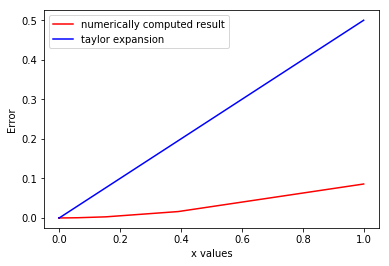

In [3]:
import matplotlib.pyplot as plt

y1 = []
y2 = []
for i in x:
    y1.append(abs(sqrt(1, 1+i) - i/2))
    y2.append(i/2)


plt.xlabel("x values")
plt.ylabel("Error")
plt.plot(x, y1, 'r', label = 'numerically computed result')
plt.plot(x, y2, 'b', label = 'taylor expansion')
plt.legend()
plt.show()

The absolute error of the Taylor approximation is very small when $x$ is close to 0, but quickly grows the farther it is from 0.

## 2. Condition finding roots of quadratic equation
Consider the quadratic polynomial $x^2+ax+b$.
1. Compute the condition number for the function which outputs the roots of polynomial and inputs $(a,b)$.
2. Make a colorplot of the condition number as a function of $a \in [-5,5]$ and $b \in [-5,5]$. 

#### Answers ####
\begin{equation}
f(a, b) = \frac{-a \pm \sqrt{a^2-4b}}{2} \\
\nabla f(a,b) = \left(\frac{-1}{2} \pm \frac{a}{\sqrt{a^2-4b}}, \mp \frac{1}{\sqrt{a^2-4b}}\right) \\
||f||= \frac{1}{2}\left|{-a \pm \sqrt{a^2-4b}}\right| \\
||(a, b)|| = \sqrt{a^2 + b^2} \\
||\nabla f(a,b)|| = \sqrt{\left( \frac{-1}{2} \pm \frac{a}{\sqrt{a^2-4b}} \right)^2 + \left( \mp \frac{1}{\sqrt{a^2-4b}} \right)^2} = \sqrt{\frac{1}{4}\left( 1 \mp \frac{2a}{\sqrt{a^2-4b}}+\frac{a^2}{a^2-4b} \right) + \frac{1}{a^2-4b}} \\
\kappa = \frac{||\nabla f(a,b)|| ||(a, b)||}{||f||} = \frac{\sqrt{\frac{1}{4}\left( 1 \mp \frac{2a}{\sqrt{a^2-4b}}+\frac{a^2}{a^2-4b} \right) + \frac{1}{a^2-4b}} \sqrt{a^2 + b^2}}{\frac{1}{2}\left|{-a \pm \sqrt{a^2-4b}}\right|}
\end{equation}

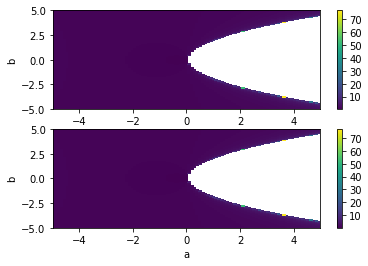

In [4]:
def root1(a, b):
    try:
        return math.sqrt(0.25*(1-(2*a)/math.sqrt(a ** 2-4*b)+a**2/(a**2-4*b)))*math.sqrt(a**2+b**2) / (.5  * abs(-a+math.sqrt(a**2-4*b)))
    except:
        return np.inf

def root2(a, b):
    try:
        return math.sqrt(0.25*(1+(2*a)/math.sqrt(a**2-4*b)+a**2/(a**2-4*b)))*math.sqrt(a**2+b**2) / (.5  * abs(-a-math.sqrt(a**2-4*b)))
    except:
        return np.inf

x = y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
C1 = np.array([root1(i, j) for i in x for j in y])
C1 = C1.reshape(100, 100)
C2 = np.array([root2(i, j) for i in x for j in y])
C2 = C1.reshape(100, 100)

fig, (ax0, ax1) = plt.subplots(2, 1)
  
c = ax0.pcolor(X, Y, C1)
ax0.set(xlabel="a", ylabel="b")
fig.colorbar(c, ax=ax0)
  
c = ax1.pcolor(X, Y, C2)
ax1.set(xlabel="a", ylabel="b")
fig.colorbar(c, ax=ax1)

plt.show()

## 3. Floating points

Consider the 32-bit single-precision floating-point number $a = 3.4657 \times 10^{25}$
1. What are the values for the sign $s$, the exponent $e$, and the fractional mantissa $f$ in the formula for normal numbers? Give $e$ and $f$ in decimal numbers with $f$ written up to 8 decimal places.
2. Convert $s$, $e$, and $f$ from part 1. into binary.

#### Answers ####
First, convert $3.4657\times10^{25} $ to binary.

In [5]:
def convertDtoB(x):
    bits = []
    while x > 0:
        bits.append(str(int(x % 2)))
        x = x // 2
    bits.reverse()
    return "".join(bits)

In [6]:
ans=convertDtoB(3.4657 * 10 ** 25)
print(f"3.4657 * 10^25 to binary: {ans}")
print(f"This number is {len(ans)} bits long.")

3.4657 * 10^25 to binary: 1110010101010111001111011110000001110001100000110000000000000000000000000000000000000
This number is 85 bits long.


Because the number is 85 bits long it can be rewritten as $1.11001010101011100111101111000000111000110000011 \times 2^{84}$. The mantissa is only 23 bits long, and it excludes the first bit of the number, so $f = {11001010101011100111101}_{2}=6641469_{10}$. The number is clearly positive, so $s = 0$. Finally, to get an exponent of 84, $e = 11010011_{2} = 211_{10}$, as it is biased by 127.

## 4. Iterative root finding 
Consider the following dynamical system 
\begin{equation}
x_{N+1}=g(x_{N}).
\end{equation}
Given we know $x$ at some time $N$ in the program we simply compute the next value of $x$ by assigning it the value $g(x_N)$. Imagine we do this for a very long time, one *might* end up in a fixed point where $x$ stops changing at all, i.e. $x=g(x)$.

That could be useful, imagine we'd like to find the roots of some function $f(x)$, we could simply pick 
\begin{equation}
g(x)=x+f(x),
\label{eq:g} \tag{1}
\end{equation}
such that the fixed point equation becomes $f(x)=0$.

1. If the initial input $x_0$ would have a small error $\epsilon$. What would the error be after $N$ iterations? Keep only terms of $O(\epsilon)$.
2. How is the latter related to the condition number of the function $g(x)$?
3. Consider $f(x)=x^2$, implement a function that runs the dynamical map for some large $N$ and a bunch of different initial conditions $x_0\in [-5,5]$. Make a plot of your results and explain what you see.
4. As you might have noticed, the algorithm doesn't always converge to the right answer. Is there a simply way to modify \eqref{eq:g} such that it still has the roots of $f(x)$ as a fixed point and at the same time is *always* stable?  

#### Answers ####

\begin{equation}
    \begin{aligned}
        \epsilon_{n+1} &=& x_{n+1} - x^{*} \\
        &=& g(x_{n}) - g(x^{*}) \\
        &=& g'(\xi_n)(x_{n} - x^{*}) \\
        &=& g'(\xi_n)\epsilon_{n} \\
        &=& g'(x^{*})(x_{n} - x^{*}) + \frac{1}{2}g''(\xi_n)(x_{n} - x^{*})^{2} + O^3(\epsilon) \\
        \epsilon_N &\approx& \frac{1}{2}g''(\xi_n)\epsilon^2_{N-1}
    \end{aligned}
\end{equation}

This is related to the condition number $\kappa$ as the condition number for functions of one variable $f(x)$ are defined as:
\begin{equation}
\begin{aligned}
\kappa &=& ||f''(x)|| \\
&=& ||\frac{d^2}{dx^2} (g(x)-x)|| \\
&=& ||g''(x) - 0|| \\
&=& ||g''(x)|| \\
&=& ||\frac{2\epsilon_N}{\epsilon^2_{N-1}}||
\end{aligned}
\end{equation}

Their close relationship makes sense as the relative condition number is a measure of the relative error.

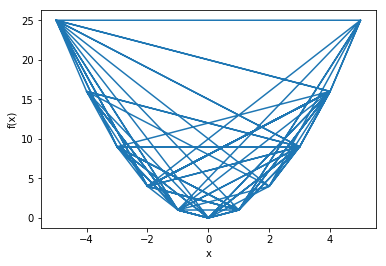

In [7]:
import random

x = []
y = []
N = 100

def dynamicMap():
    for i in range(N):
        x0 = random.randint(-5, 5)
        x.append(x0)
        y.append(x0**2)

dynamicMap()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()


This creates a dynamic map, however the range of initial conditions is bounded s.t. the movements are "random" within the limit of -5 to 5, and still obey $f(x) = x^2$, so it forms a parabola. For smaller N, the parabola would be less apparent, and for bigger, it becomes more symmetric and "filled" with path lines.

In order for a fixed point to always be stable, it must also be Lyapunov stable, meaning $\forall \epsilon>0 \exists \delta>0$ such that if $||x_0 - x*||<\delta$ then $\forall t \geq 0, ||x(t) - x*||<\epsilon$. Then, (1) can be modified to follow Newton's method with the convergence restraints previously stated to ensure stability of $g(x_{N+1}) = x_N - \frac{f(x_N)}{f'(x_N)}$